💡 The data used here is the heart disease dataset from UCL Machine Learning Repositary. [link here](https://archive.ics.uci.edu/ml/datasets/heart+disease)

<ul>
<li>💡 There 11 attributes to be considered. These attributes are abbrevated medical terms, and their meanings can be found in the dataset decription on UCL.</li>

<li>💡 To know what the medical terms mean, you might have to do a proper lookup. Nothing serious, Google search should do 🔍.</li>
</ul>

<code style="background:teal;color:white">The goal of this analysis is to predict patients who have a heart disease by looking at history of those who have had.</code>

💡 The dataset has been labelled for us. It is a Machine Learning Classification problem.

Ready?? Let's get into it!! 👍🏽

In [1]:
#we start by importing the necessary module

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

below is a screenshot of the data from Excel

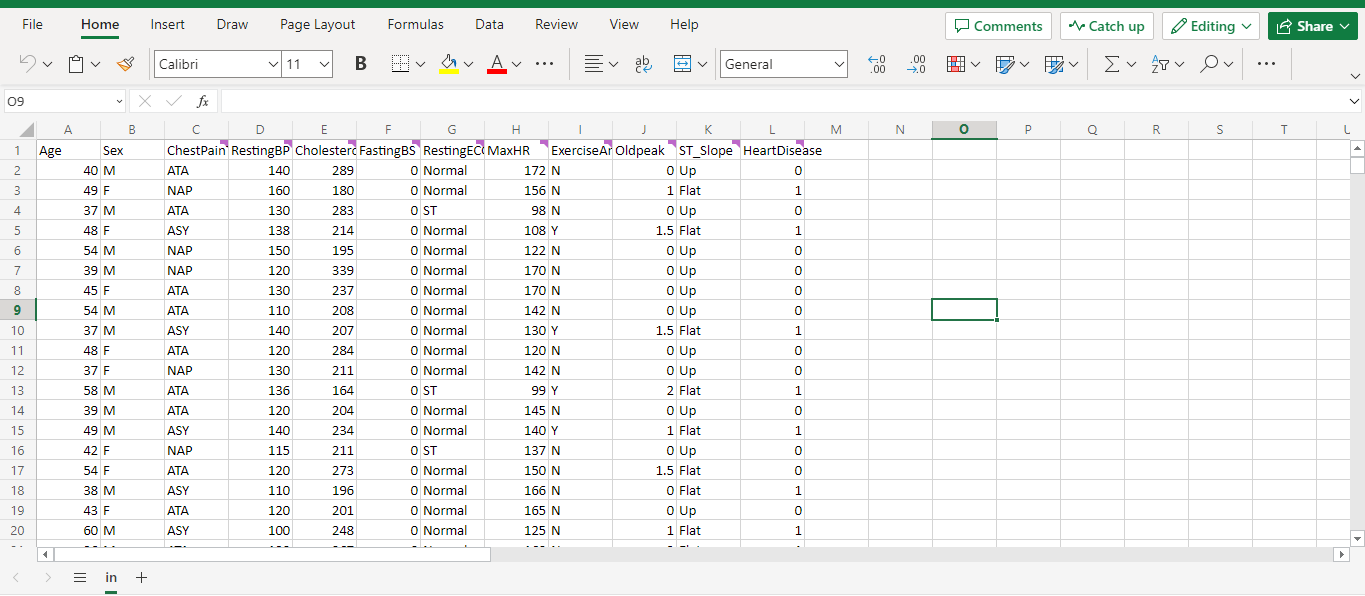

Now let's import the data into our workspace and inspect it

In [2]:
heart_data = pd.read_csv(r"C:\Users\olami\Downloads\heart.csv")

In [3]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


💡 We can see that the data has 918 rows and 12 columns (11 attributes and the target variable - that indicates whether or not the patient has a heart disease)

In [4]:
#gets the data type of each column

heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
#checks if the data has null values

print("Null values?", heart_data.isnull().values.all()) 
print('-------')
print(heart_data.isnull().sum())

Null values? False
-------
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Great! There are no null values in the data

In [6]:
#summary statistics of the data

heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We can see that the least cholerestorol level is 0. Also a resting blood pressure of 0. I wonder if that is a normal value or wrong data.

The age of people in this data range from 28 to 77.

How many people have a heart disease?

In [7]:
heart_data[heart_data['HeartDisease'] == 1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [8]:
#percentage of people with a heart disease

heart_data['HeartDisease'].sum()/heart_data['HeartDisease'].count() * 100

55.33769063180828

💡 In this dataset, 508 persons making over 55% of the data have a heart disease


Let's check the difference by sex. Which gender in the data have more people with a heart disease?

In [9]:
#gets the number of males and females in the data. There are 725 males and 193 females

heart_data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [10]:
#groupby Sex and count the heart disease for each Sex

heart_disease_by_gender = heart_data.groupby('Sex')['HeartDisease'].value_counts()
print(heart_disease_by_gender)

Sex  HeartDisease
F    0               143
     1                50
M    1               458
     0               267
Name: HeartDisease, dtype: int64


💡

Of 193 females, 50 have a heart disease and 143 do not.


Of 725 males, 458 have a heart disease and 267 do not


Let's visualize this

<AxesSubplot:xlabel='Sex', ylabel='count'>

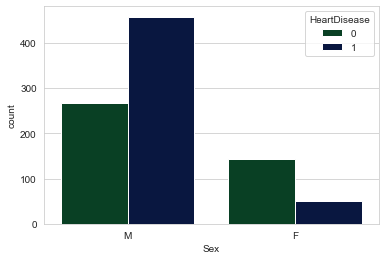

In [11]:
sns.set_style('whitegrid')
sns.set_palette('ocean')

sns.countplot(x='Sex', data=heart_data, hue='HeartDisease')

<code style="background:teal;color:white">From the plot above, we can say that of the population in this data, more males have a heart disease than females.</code>

Let's visualize by age distribution.

❔ Which age group tends to have a heart disease more?

In [12]:
#get the people with a heart disease and assign to hD- heart Disease

hD = heart_data[heart_data['HeartDisease'] == 1]

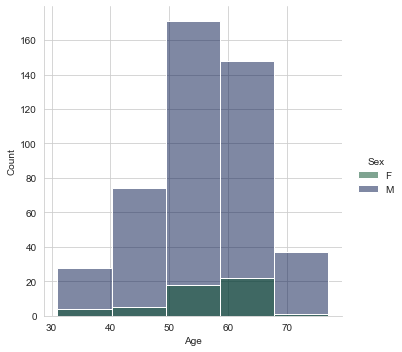

In [13]:
#seaborn plot

sns.set_style('whitegrid')

sns.displot(x='Age', data=hD, hue='Sex', bins=5)

💡 From the plot, we can see that more people in their 50s and 60s have a heart disease compared to other age groups.

❔ Can we conclude that older people are more likely to have a heart disease? Does this say for sure that there is correlation between age and heart disease?

Let's plot distributions to find outliers

Text(0.5, 1.0, 'Cholesterol Level Distribution')

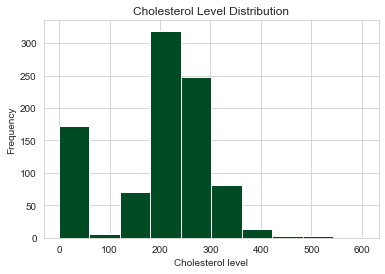

In [14]:
#summarizes the distribution of values for Cholesterol

heart_data['Cholesterol'].plot(kind='hist')
plt.xlabel('Cholesterol level')
plt.title('Cholesterol Level Distribution')

Plotting the distribution of this data shows that a good number have a cholesterol level between 0 and 100. But the most frequent is between 200 and 300.

Text(0.5, 1.0, 'Cholesterol Level Distribution')

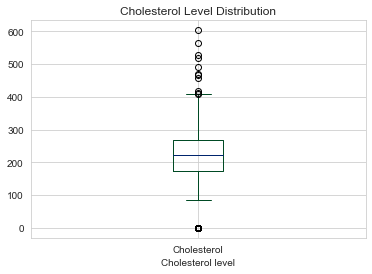

In [15]:
#boxplot - distribution of values for Cholesterol

heart_data['Cholesterol'].plot(kind='box')
plt.xlabel('Cholesterol level')
plt.title('Cholesterol Level Distribution')

The cholesterol levels between 0 and 100 and between 500 and 600 appear to be outliers

Text(0.5, 1.0, 'Resting BP Distribution')

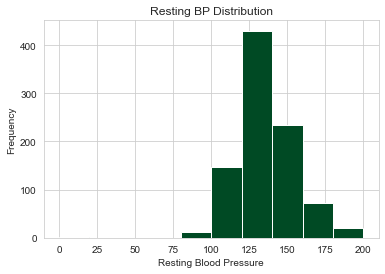

In [16]:
#summarizes the distribution of values for RestingBP

heart_data['RestingBP'].plot(kind='hist')
plt.xlabel('Resting Blood Pressure')
plt.title('Resting BP Distribution')

Here, we see the most frequent resting blood pressures is between 125 and 150.

And only a substantial amount is less than 25. Now, this might indicate a wrong data or an extreme condition.

Let's plot it on a boxplot

Text(0.5, 1.0, 'Resting BP Distribution')

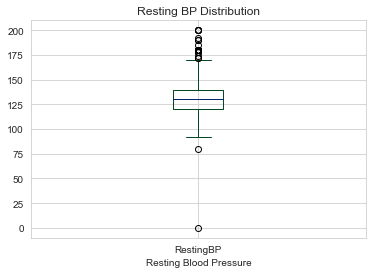

In [17]:
#summarizes the distribution of values for RestingBP

heart_data['RestingBP'].plot(kind='box')
plt.xlabel('Resting Blood Pressure')
plt.title('Resting BP Distribution')

Text(0.5, 1.0, 'Age Distribution')

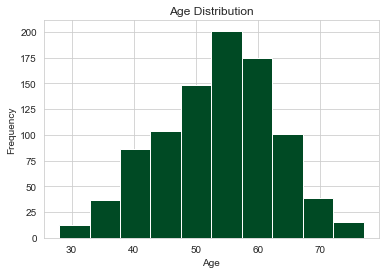

In [18]:
#summarizes the distribution of values for Age

heart_data['Age'].plot(kind='hist')
plt.xlabel('Age')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Max Heart Rate Distribution')

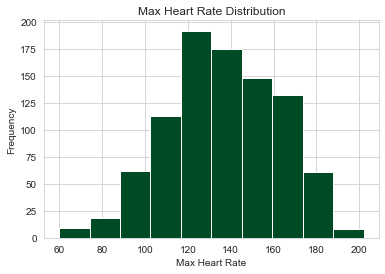

In [19]:
#summarizes the distribution of values for MaxHR

heart_data['MaxHR'].plot(kind='hist')
plt.xlabel('Max Heart Rate')
plt.title('Max Heart Rate Distribution')

Text(0.5, 1.0, 'Oldpeak Distribution')

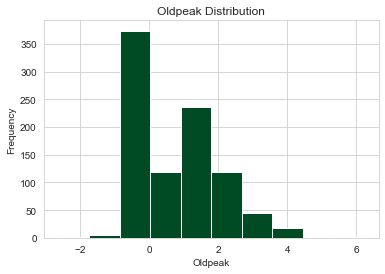

In [20]:
#summarizes the distribution of values for Oldpeak

heart_data['Oldpeak'].plot(kind='hist')
plt.xlabel('Oldpeak')
plt.title('Oldpeak Distribution')

❔ What to do with these outliers?

There are different ways to treat outliers, like doing mean computation (i.e replacing the outliers with the mean of the data), replacing them with NAN (i.e declaring them as null values), etc.

You can work with someone familiar with the medical scope that can tell why some values are irregular. e.g some of the values might have been imputed in another scale, like mmol/l instead of mg/dl.

Anyways, I won't be doing any of these because these values might actually be correct, as they could be extreme conditions of patients. I am not familiar with the medical scope, so I can't tell otherwise.

Howbeit, I will droping the rows with the 'outliers'. 

Outliers can be computed as:
lower (cutoff) = q1 - 1.5 * iqr
upper (cutoff) = q3 + 1.5 * iqr

just as boxplot does.

In [21]:
#a function to find the outlier

def outlier(series, dataframe):
    q1 = np.quantile(series, 0.25)
    q3 = np.quantile(series, 0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    return(dataframe[(series < lower) | (series > upper)])

In [22]:
#function apllied on the variables to get the outliers

Cholesterol_outlier = outlier(heart_data['Cholesterol'], heart_data)
RestingBP_outlier = outlier(heart_data['RestingBP'], heart_data)
MaxHR_outlier = outlier(heart_data['MaxHR'], heart_data) 
Oldpeak_outlier = outlier(heart_data['Oldpeak'], heart_data)

In [23]:
#to drop the rows of the data in the outliers. merge on outer and left-only

heart_data = pd.merge(heart_data, Cholesterol_outlier,indicator=True, 
                      how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [24]:
#to drop the rows of the data in the outliers.

heart_data = pd.merge(heart_data, RestingBP_outlier,indicator=True, 
                      how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [25]:
#to drop the rows of the data in the outliers.

heart_data = pd.merge(heart_data, MaxHR_outlier,indicator=True, 
                      how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [26]:
#to drop the rows of the data in the outliers.

heart_data = pd.merge(heart_data, Oldpeak_outlier,indicator=True, 
                      how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [27]:
heart_data.reset_index(drop=True, inplace=True)
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
697,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
698,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
699,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
700,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


We have only 702 rows of data left after dropping outliers.

In [28]:
#we do this to check if the values in these categorical variables match those in the data description. 
#And from the result, we can see that they do!

print(heart_data['ChestPainType'].unique())
print(heart_data['RestingECG'].unique())
print(heart_data['ExerciseAngina'].unique())
print(heart_data['ST_Slope'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


Let's see a scatterplot of all the numerical variables in the data

In [29]:
#numerical variables of heart_data

num_heart_data = heart_data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]

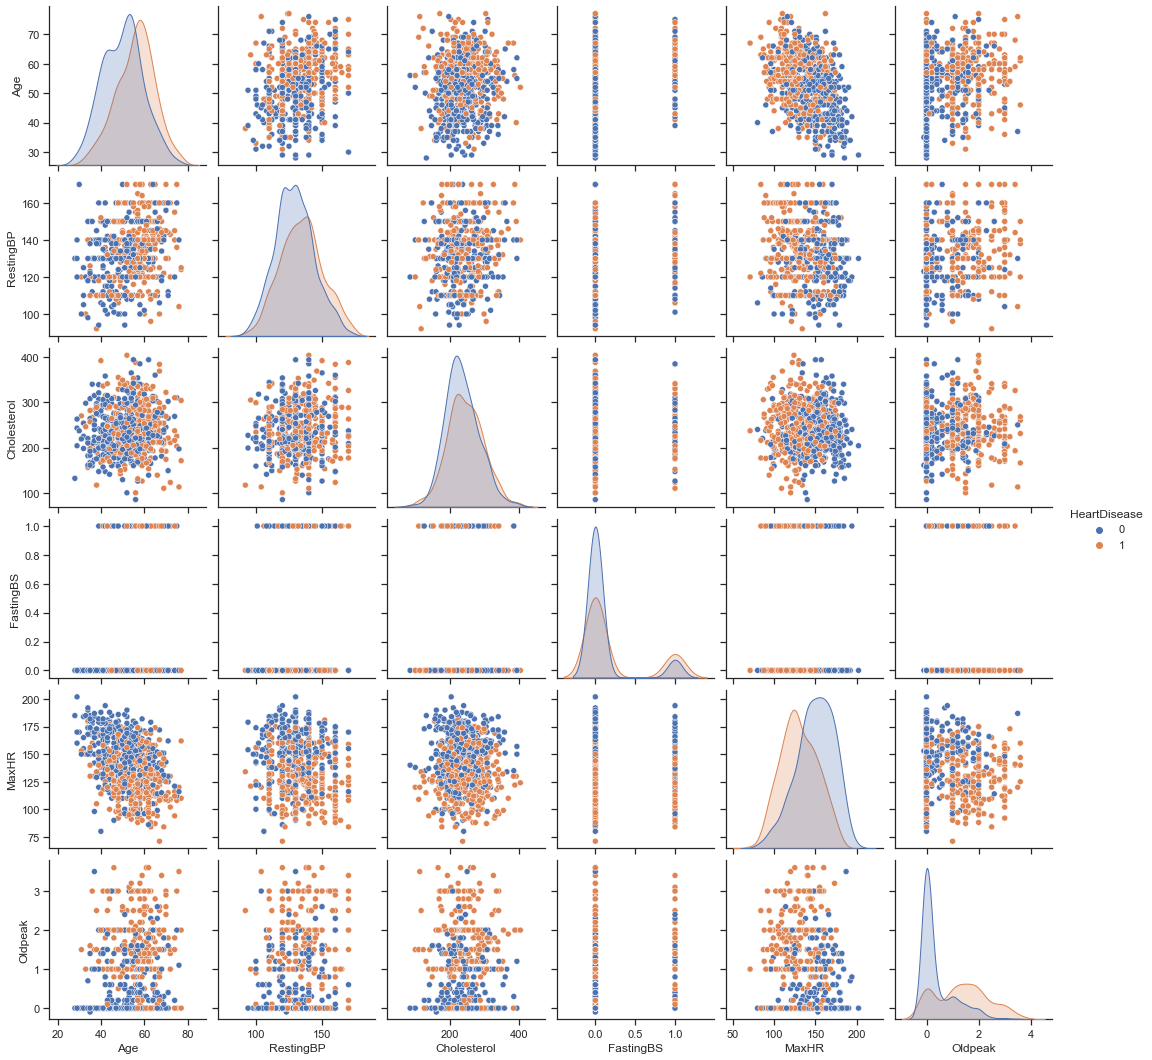

In [30]:
sns.set_theme(style="ticks")

sns.pairplot(num_heart_data, hue="HeartDisease")

💡 From inspecting this plot, I can see a negative linear relationship between MaxHR and Age. As age is increasing, the MaxHR is decreasing. Also, patients with a heart diesease, denoted by the orange dot are prominent at the bottom, which migght indicate that patient that are with are heart disease have a low Heart Rate.

💡 There seem to be a positive linear relationship between RestingBP and Age. As age increases, resting BP is higher. Does this mean that older people tend to have higher lood pressure than younger people?

What is the correlation between these variables?

In [31]:
correlation = round(num_heart_data.corr(), 2)
correlation

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.00,0.27,0.07,0.24,-0.40,0.28,0.31
RestingBP,0.27,1.00,0.09,0.17,-0.13,0.19,0.17
Cholesterol,0.07,0.09,1.00,0.03,-0.00,0.07,0.10
FastingBS,0.24,0.17,0.03,1.00,-0.11,0.07,0.16
MaxHR,-0.40,-0.13,-0.00,-0.11,1.00,-0.28,-0.40
Oldpeak,0.28,0.19,0.07,0.07,-0.28,1.00,0.50
HeartDisease,0.31,0.17,0.10,0.16,-0.40,0.50,1.00


💡💡💡💡

Looks like I was wrong about the negative linear relationship between MaxHR and Age. And positive linear relationship between RestingBP and Age. Both with -0.4 and 0.27 respectively.

That's far from -1 or 1 for us to conclude.

There's a linear relationship between Oldpeak and Heart disease.

We will find their p-value before we conclude on their realtionship. But first, let's visualize this with a heatmap

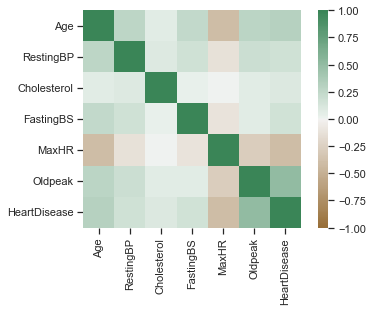

In [32]:
#Heatmap - the closer the correlation coefficient is to 1, the greener the squares get.
#          the closer the correlation coefficient is to -1, the browner the squares get.

correlation_map = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, 
                        cmap=sns.diverging_palette(50, 500, n=500),square=True)

plt.show()

The following stands out (brighter colors):
    <ul>
    <li>Oldpeak and HeartDisease</li>
    <li>MaxHR and HeartDisease</li>
    <li>MaxHR and Age</li>
    <li>RestingBP and Age</li>
    <li>Oldpeak and MaxHR</li>
    </ul>

Let's investigate their correlation some more

In [33]:
#linear regression table

model = smf.ols('HeartDisease ~ Oldpeak + MaxHR + RestingBP + Age + Cholesterol + FastingBS', data=heart_data)
corr_table = model.fit()

print(corr_table.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     60.09
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           6.10e-60
Time:                        19:48:06   Log-Likelihood:                -360.89
No. Observations:                 702   AIC:                             735.8
Df Residuals:                     695   BIC:                             767.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5606      0.206      2.723      

From the regression table, we see that RestingBP, Cholesterol, and Age have p-values greater than 0.05. Which indicates that there is no relationship between them and the target, HeartDisease.

The more related values to Heart Disease are: Oldpeak, MaxHR, FastingBS

Let's get to building our models. 

We will be trying 7 different algorithms.

In [34]:
#categorical variables of heart_data
cat_heart_data = heart_data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

#get dummy variable for the categorical variables
dummy_cat_heart_data = pd.get_dummies(cat_heart_data)

In [35]:
#the numerical variables of heart_data exxcluding the target variable

num_heart_data = heart_data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]

In [36]:
#train and test data 
#merges the numerical variables with the dummy categorical variables above

X = pd.concat([num_heart_data, dummy_cat_heart_data], axis=1)
y = heart_data['HeartDisease']

In [37]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
698,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
699,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
700,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


Let's scale the data to put them in a more comparable unit

In [38]:
#scales the X (train data)

scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [39]:
#splits the data into train and test, 80% and 20% respectively
trainX, testX, train_y, test_y = train_test_split(scaledX, y, test_size=20, random_state=42)

In [40]:
#model 1
#LogisticRegression() model

LRmodel = LogisticRegression()
LRmodel.fit(trainX, train_y)

LogisticRegression()

Model score:  0.9
Confusion matrix:


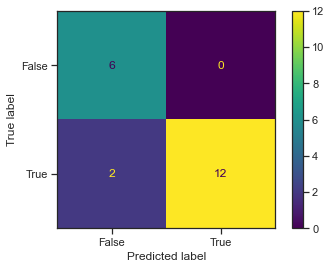

In [41]:
#gets model score and confusion matrix

print("Model score: ", LRmodel.score(testX, test_y))

ypred = LRmodel.predict(testX)

confusion_matrix = metrics.confusion_matrix(ypred, test_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print('Confusion matrix:')
cm_display.plot()
plt.show()

💡💡💡

The model looks like it perfformed good. But let's look at it in a real life scenerio.

We told 2 patients that they did not have a heart disease and told them they could leave without getting treatment, when they actually have a heart disease (False Negative).

That's not good performance if you ask me.

In [42]:
#model 2
#RandomForestClassifier() model

RFCmodel = RandomForestClassifier(n_estimators = 100)
RFCmodel.fit(trainX, train_y)

RandomForestClassifier()

Model score:  0.85
Model Accuracy:  0.85
Confusion matrix:


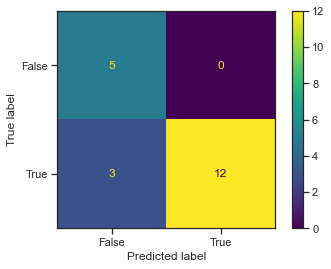

In [43]:
#gets model score and confusion matrix

print("Model score: ", RFCmodel.score(testX, test_y)) 

ypred = RFCmodel.predict(testX)

print('Model Accuracy: ', metrics.accuracy_score(ypred, test_y))

confusion_matrix = metrics.confusion_matrix(ypred, test_y) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print('Confusion matrix:')
cm_display.plot()
plt.show()

In [44]:
#model 3
#Support Vector Machine model

SVCmodel = SVC(kernel = 'linear',gamma = 'scale', shrinking = False) 
SVCmodel.fit(trainX, train_y)

SVC(kernel='linear', shrinking=False)

Model score:  0.9
Confusion matrix:


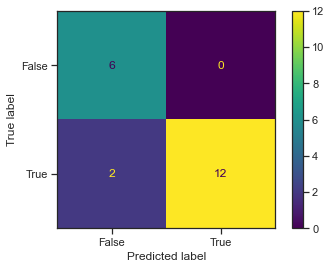

In [45]:
#gets model score and confusion matrix

print("Model score: ", SVCmodel.score(testX, test_y)) 

ypred = SVCmodel.predict(testX)

confusion_matrix = metrics.confusion_matrix(ypred, test_y) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print('Confusion matrix:')
cm_display.plot()
plt.show()

In [46]:
#model 4
# Linear Support Vector Machine model 

LSVCmodel = LinearSVC(max_iter=10000) 
LSVCmodel.fit(trainX, train_y)

LinearSVC(max_iter=10000)

Model score:  0.9
Confusion matrix:


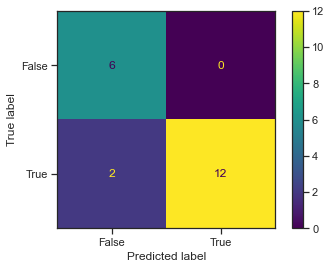

In [47]:
#gets model score and confusion matrix

print("Model score: ", LSVCmodel.score(testX, test_y)) 

ypred = LSVCmodel.predict(testX)

confusion_matrix = metrics.confusion_matrix(ypred, test_y) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print('Confusion matrix:')
cm_display.plot()
plt.show()

In [48]:
#model 5
#DecisionTreeClassifier model 

DTCmodel = DecisionTreeClassifier(random_state=0) 
DTCmodel.fit(trainX, train_y)

DecisionTreeClassifier(random_state=0)

Model score:  0.8
Confusion matrix:


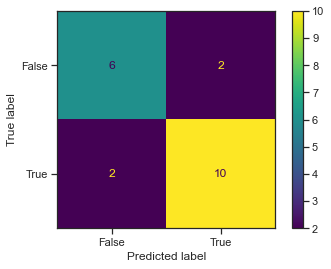

In [49]:
#gets model score and confusion matrix

print("Model score: ", DTCmodel.score(testX, test_y)) 

ypred = DTCmodel.predict(testX)

confusion_matrix = metrics.confusion_matrix(ypred, test_y) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print('Confusion matrix:')
cm_display.plot()
plt.show()

In [50]:
#model 6
#XGBClassifier model 

XGBmodel = XGBClassifier() 
XGBmodel.fit(trainX, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Model score:  0.9
Confusion matrix:


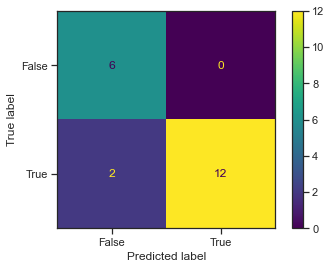

In [51]:
#gets model score and confusion matrix

print("Model score: ", XGBmodel.score(testX, test_y)) 

ypred = XGBmodel.predict(testX)

confusion_matrix = metrics.confusion_matrix(ypred, test_y) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print('Confusion matrix:')
cm_display.plot()
plt.show()

In [52]:
#model 7
#LightGBM Classifier

LGBMmodel = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
LGBMmodel.fit(trainX, train_y)

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

Model score:  0.95
Confusion matrix:


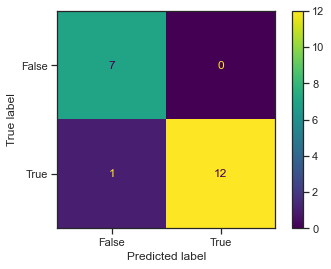

In [53]:
#gets model score and confusion matrix

print("Model score: ", LGBMmodel.score(testX, test_y)) 

ypred = LGBMmodel.predict(testX)

confusion_matrix = metrics.confusion_matrix(ypred, test_y) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print('Confusion matrix:')
cm_display.plot()
plt.show()

LightGBM Classifier is our best model so far.

It only classifies 1 patient's condition wrongly.

In a real-life scenerio, that's still dangerous though. 
I don't want to imagine going home with a wrong doctors' report

In [54]:
def feature_importance(model, X , num = 20, fig_size = (50, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('Features According to Importance')
    plt.tight_layout()
    plt.show()

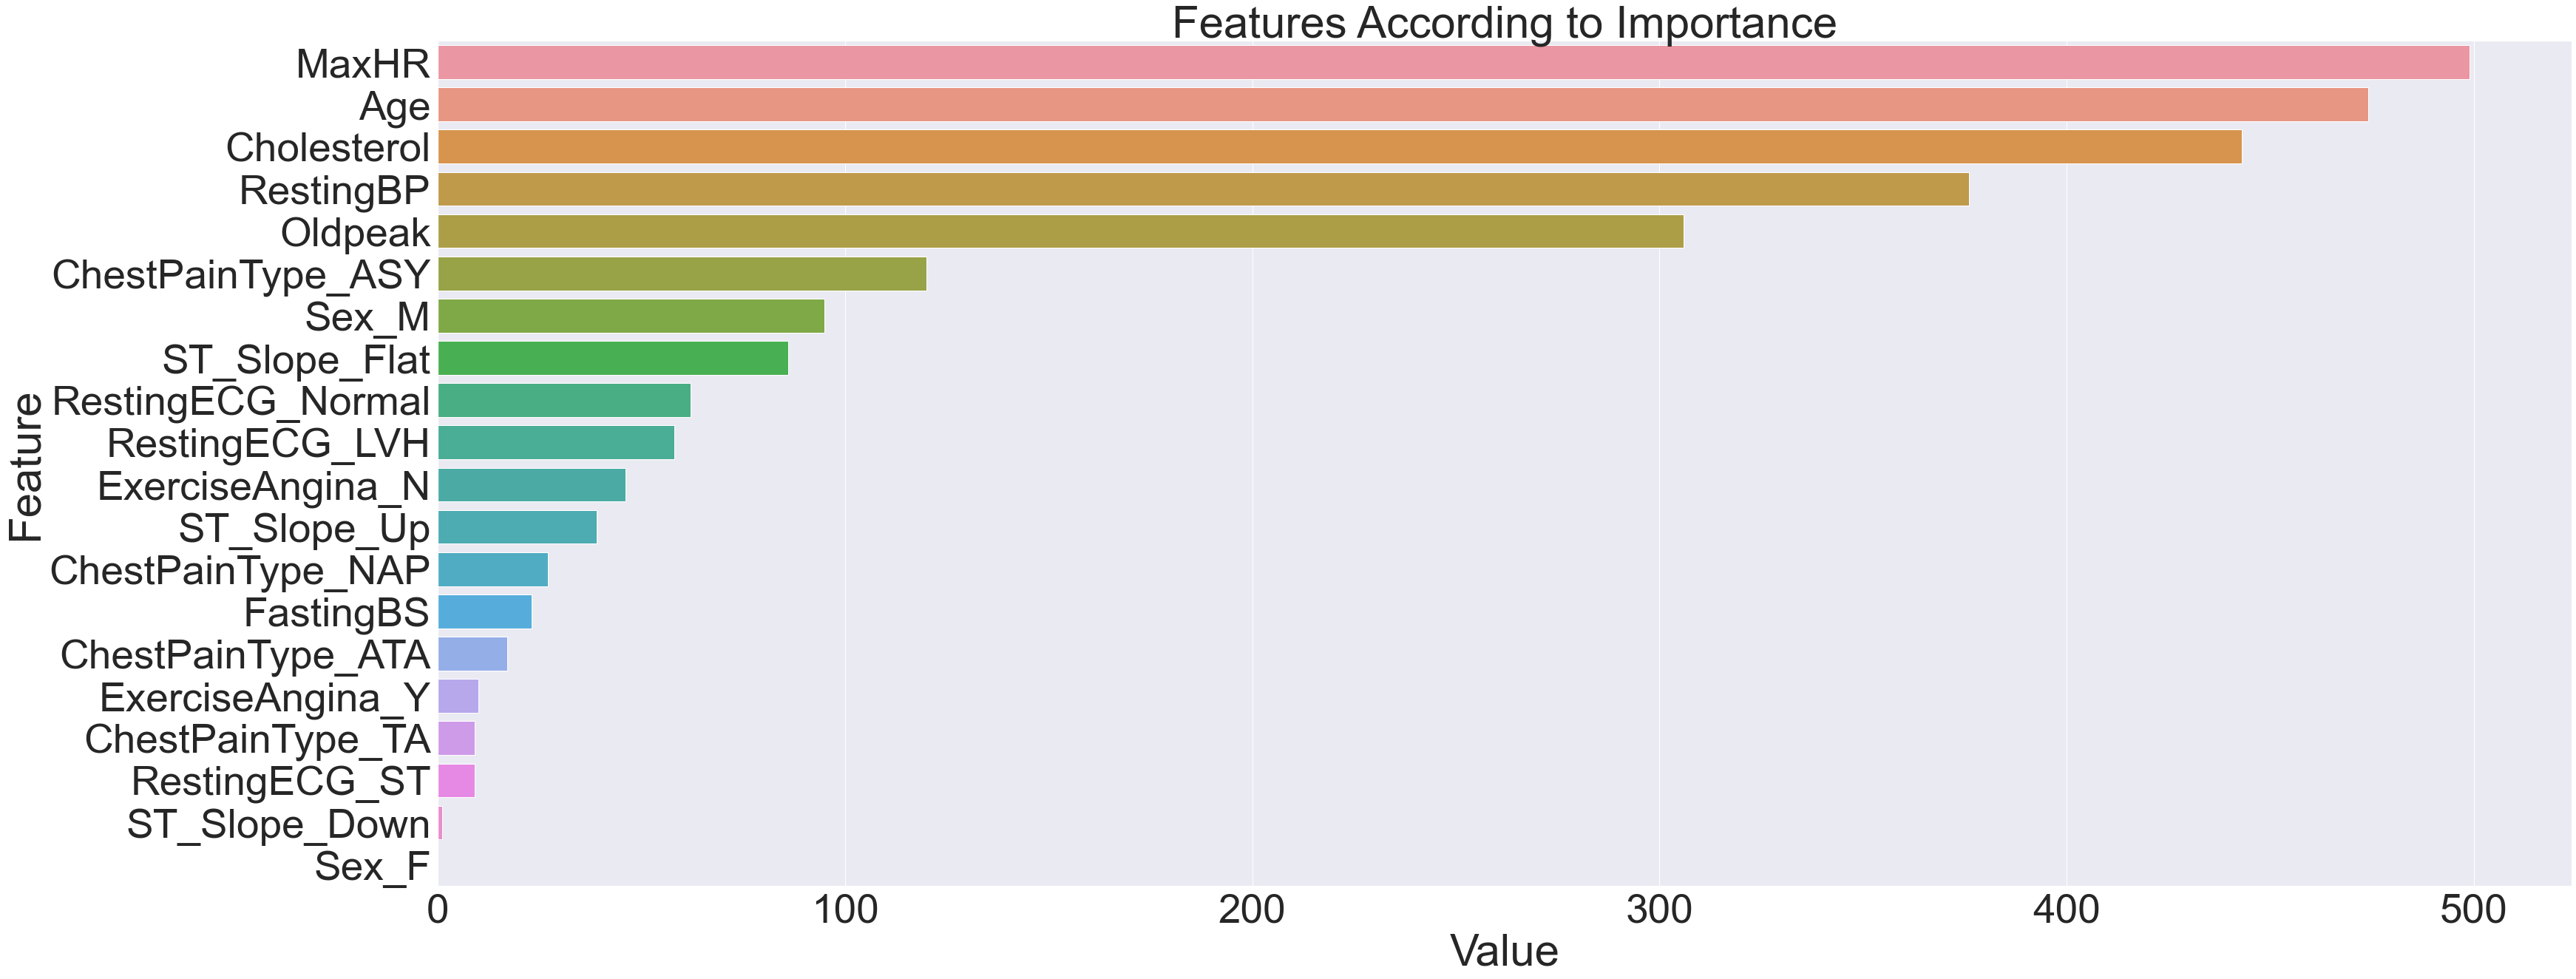

In [55]:
feature_importance(LGBMmodel, X)

5 important features to this model: MaxHR, Age, Cholesterol, RestingBP, Oldpeak . 